## Variational AutoEncoder for Discrete Random Variables

### Prepare

dataset: MNIST(binary)

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import gzip
f = gzip.open('mnist.pkl.gz')

In [3]:
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = np.load(f)

In [4]:
train_x[train_x > 0.5] = 1.0
train_x[train_x <= 0.5] = 0.0
valid_x[valid_x > 0.5] = 1.0
valid_x[valid_x <= 0.5] = 0.0
test_x[test_x > 0.5] = 1.0
test_x[test_x <= 0.5] = 0.0

### Target Propagation

via Difference Target Propagation (instead of Back Propagation)  
using approximate inverse (instead of reparameterization trick)  
(https://arxiv.org/abs/1412.7525)

In [5]:
from gumbel_dtp import VAE_DTP
model = VAE_DTP()
model.fit(x_train=train_x, x_valid=valid_x, n_epochs=50)

q_y_x1/weights:0
q_y_x1/biases:0
q_y_x2/weights:0
q_y_x2/biases:0
q_y_x3/weights:0
q_y_x3/biases:0
p_x_y1/weights:0
p_x_y1/biases:0
p_x_y2/weights:0
p_x_y2/biases:0
p_x_y3/weights:0
p_x_y3/biases:0
Epoch 1, loss: -181.528, enc_loss: 1.633
val_loss: -176.631, time: 20.475
Epoch 2, loss: -175.079, enc_loss: 1.330
val_loss: -170.894, time: 20.484
Epoch 3, loss: -179.198, enc_loss: 10.287
val_loss: -172.048, time: 21.530
Epoch 4, loss: -155.014, enc_loss: 5.160
val_loss: -156.495, time: 21.882
Epoch 5, loss: -155.618, enc_loss: 3.194
val_loss: -152.740, time: 22.102
Epoch 6, loss: -153.468, enc_loss: 2.618
val_loss: -151.374, time: 22.731
Epoch 7, loss: -151.451, enc_loss: 1.718
val_loss: -150.879, time: 23.232
Epoch 8, loss: -158.401, enc_loss: 1.484
val_loss: -150.903, time: 22.670
Epoch 9, loss: -150.197, enc_loss: 3.062
val_loss: -150.773, time: 21.988
Epoch 10, loss: -151.462, enc_loss: 1.891
val_loss: -150.780, time: 22.088
Epoch 11, loss: -167.011, enc_loss: 2.591
val_loss: -150.096

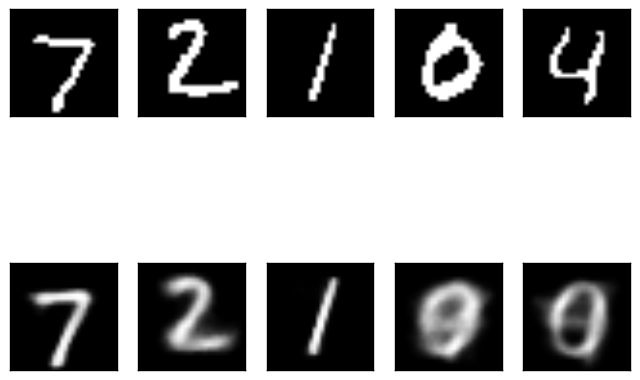

In [6]:
targets = test_x[0:5]

latents = model.predict(x_data=targets)

fig = plt.figure(figsize=(8, 6))
for i, target in enumerate(targets):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(target.reshape(28, 28), 'gray')
for i, latent in enumerate(latents):
    ax = fig.add_subplot(2, 5, 6+i, xticks=[], yticks=[])
    ax.imshow(latent.reshape(28, 28), 'gray')

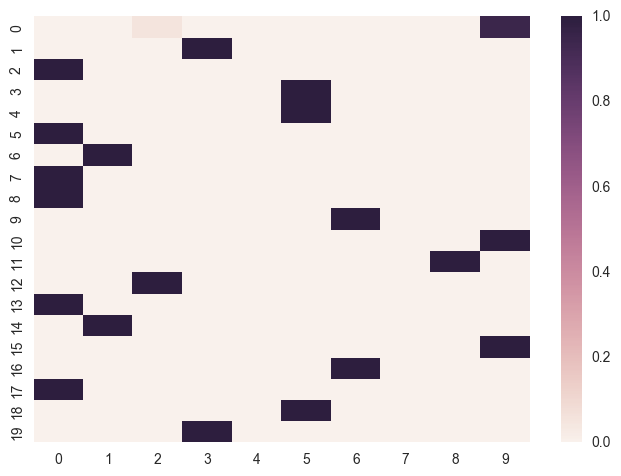

In [7]:
encode = model.encoder(x_data=test_x[0:1])
import seaborn as sns
sns.heatmap(encode)

---

### Back Propagation
using Gumbel-Softmax trick
(https://arxiv.org/abs/1611.01144)
(https://arxiv.org/abs/1611.00712)

In [5]:
from gumbel_bp import Gumbel_BP
model2 = Gumbel_BP()
model2.fit(x_train=train_x, x_valid=valid_x, n_epochs=50)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch 1, loss: -177.552, val_loss: -189.789, time: 13.920
Epoch 2, loss: -174.366, val_loss: -166.565, time: 13.679
Epoch 3, loss: -152.107, val_loss: -146.882, time: 13.456
Epoch 4, loss: -143.635, val_loss: -136.715, time: 14.075
Epoch 5, loss: -141.519, val_loss: -127.095, time: 14.606
Epoch 6, loss: -130.851, val_loss: -121.468, time: 14.519
Epoch 7, loss: -120.053, val_loss: -116.207, time: 14.320
Epoch 8, loss: -123.196, val_loss: -112.025, time: 14.551
Epoch 9, loss: -117.984, val_loss: -109.512, time: 14.245
Epoch 10, loss: -113.037, val_loss: -107.438, time: 14.472
tau: 0.295542, lr:0.000990
Epoch 11, loss: -102.129, val_loss: -105.433, time: 14.315
Epoch 12, loss: -107.137, val_loss: -103.630, time: 15.279
Epoch 13, loss: -104.639, val_loss: -102.739, time: 15.315
Epoch 14, loss: -109.373, val_loss: -101.355, time: 15.501
Epoch 15, loss: -103.212, val_loss: -100.262, time: 17.624
Epoch 16, loss: -104.40

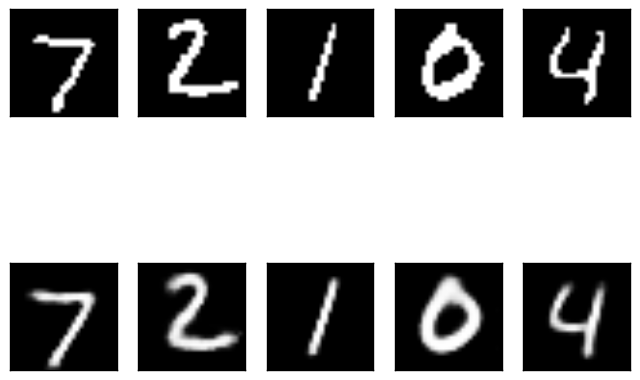

In [6]:
targets = test_x[0:5]

latents = model2.predict(x_data=targets)

fig = plt.figure(figsize=(8, 6))
for i, target in enumerate(targets):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(target.reshape(28, 28), 'gray')
for i, latent in enumerate(latents):
    ax = fig.add_subplot(2, 5, 6+i, xticks=[], yticks=[])
    ax.imshow(latent.reshape(28, 28), 'gray')

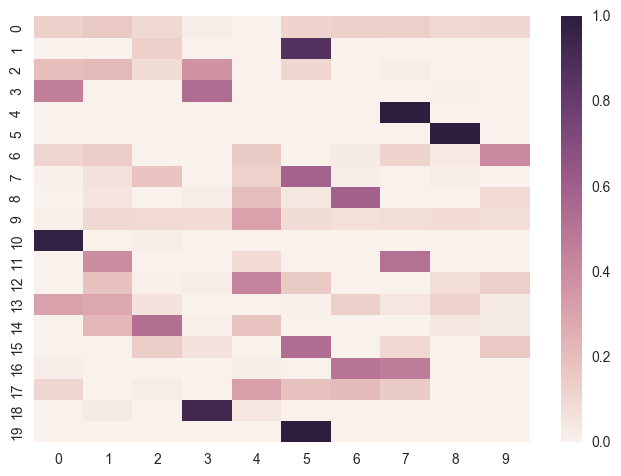

In [7]:
encode = model2.encoder(x_data=test_x[0:1])
import seaborn as sns
sns.heatmap(encode)

(-0.5, 27.5, 27.5, -0.5)

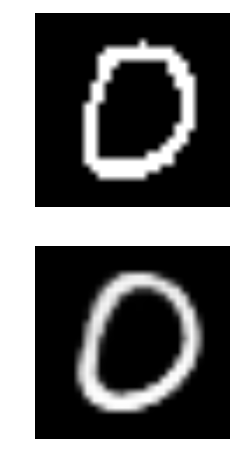

In [8]:
reconstruct = model2.predict(x_data=test_x[10:11])
plt.gray()
plt.subplot(2, 1, 1)
plt.imshow(test_x[10:11].reshape(28, 28))
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(reconstruct.reshape(28, 28))
plt.axis('off')